#### Practice Question 1: Plotting sin(x)

Use matplotlib to plot the value of $sin(x)$ from 0 to 6.28 in steps of 0.01

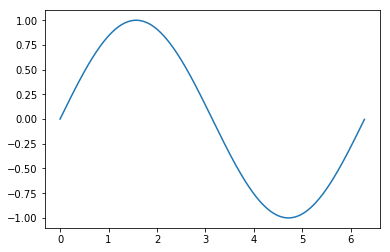

In [1]:
import matplotlib.pyplot as pyplot
import math

%matplotlib inline

def frange(start, stop, step): 
    
    result=[]
    x=start
    while(x<stop): 
        result.append(x)
        x+=step
    return result 

xvalues=frange(0, 6.28, 0.01)
yvalues=[math.sin(x) for x in xvalues]

pyplot.plot(xvalues, yvalues)
pyplot.show()

#### Practice Question 2: Formatting Dates

Write a function convert_date(s), that, given a string `s` formatted like `April 25, 2019`, returns a datetime object representing that string.

You may wish to consult https://docs.python.org/3.1/library/datetime.html and https://stackoverflow.com/questions/466345/converting-string-into-datetime

The following is a list of format code: 
```
%a    Abbreviated weekday name.
%A    Full weekday name.
%w    Weekday as a decimal number.
%m    Month as a decimal number [01,12].
%b    Abbreviated month name.
%B    Full month name.
%y    Last two digits of the current year.
%Y    Full year, including first two digits.
%d    Day of the month as a decimal number.
%H    Hour (24-hour clock) as a zero-padded decimal number.
```

The following code will create a datetime object representing string `'25-April-2019'`.
```
from datetime import datetime
datetime.strptime('25-April-2019', '%d-%B-%Y')
```

The following code will create a datetime object representing string `'25/Apr/2019'`.
```
from datetime import datetime
datetime.strptime('25/Apr/2019', '%d/%b/%Y')
```


In [75]:
from datetime import datetime
datetime.strptime('25-April-2019', '%d-%B-%Y')

datetime.datetime(2019, 4, 25, 0, 0)

In [76]:
from datetime import datetime
datetime.strptime('25/Apr/2019', '%d/%b/%Y')

datetime.datetime(2019, 4, 25, 0, 0)

In [50]:
from datetime import datetime
def convert_date(s): 
    
    return datetime.strptime(s, '%B %d, %Y')

In [52]:
convert_date('April 25, 2019') == datetime(2019, 4, 25, 0, 0)

True

In [53]:
convert_date('April 25, 2019') > convert_date('April 1, 2019')

True

In [82]:
countdown=convert_date('April 25, 2019')-datetime.today()
print('Countdown to the final exam: {} days'.format(countdown.days))

Countdown to the final exam: 24 days


#### Question 1: Plotting Stock Data [6 points]

Using the file `DJI.csv`, create a plot using `matplotlib` with the date along the x-axis (as a datetime structure), and the opening stock value for the date as the y value.

Hint: Use `datetime.strptime()` to convert the string representation of a date to the `datetime.datetime` object. See the practice question.

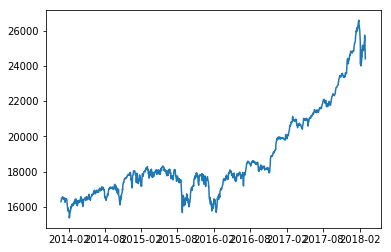

In [81]:
import csv
import matplotlib.pyplot as pyplot
from datetime import datetime

# Your code here.


### BEGIN SOLUTION
x = []
y = []

with open('DJI.csv', 'r') as f:    
    reader = csv.DictReader(f)
    
    for row in reader:
        x.append(datetime.strptime(row['Date'], '%Y-%m-%d'))
        y.append(float(row['Open']))
pyplot.plot(x,y)
pyplot.show()
### END SOLUTION

#### Question 2: Event Related Potentials [5 points]

In neuroscience, event-related potentials (or ERPs) are the averaged electrical activity of the brain following an event. For instance, they might represent the neural response to something as simple as seeing a shape flash on a computer screen.

Data in ERP experiments is often quite noisy, and so we rely on the average of many observations to compute our ERP. Since we measure the voltage at many time points, we have to average the voltage for every trial at every time point like so:
<table class="table">
    <thead>
      <tr>
        <th></th>
        <th>Time 0</th>
        <th>Time 1</th>
        <th>Time 2</th>
        <th>Time 3</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <th>Trial 1</th>
        <td>1</td>
        <td>3</td>
        <td>7</td>
        <td>4</td>
      </tr>
            <tr>
        <th>Trial 2</th>
        <td>2</td>
        <td>2</td>
        <td>6</td>
        <td>3</td>
      </tr>
      <tr>
        <th>Trial 3</th>
        <td>1</td>
        <td>4</td>
        <td>7</td>
        <td>2</td>
      </tr>
       <tr><td></td></tr>
      <tr>
        <th>AVERAGE</th>
        <td>((1+2+1) / 3) = 1.333</td>
        <td>((3+2+4) / 3) = 3.000</td>
        <td>((7+6+7) / 3) = 6.667</td>
        <td>((4+3+2) / 3) = 3.000</td>
      </tr>
    </tbody>
  </table>
  
In this table, each column (t1, t2, t3, t4) represents a time point after an event, and each row gives the value at that time for that event. To calculate our ERP, we just add up all the values in one column and divide by the number of trials (see the last row).


The file `eeg.csv` contains some simulated ERP data, formatted like the table above (but with many more data points). Write a function that, given only the filename, produces a plot of the ERP from these data. 

Your output should look something like this:
<img src="http://brain.mcmaster.ca/joey/python/17/img/erp.png">

In [1]:

import matplotlib.pyplot as plt
import csv

# Your code here.
### BEGIN SOLUTION
f=open('eeg.csv', 'r')
rows = csv.reader(f)
header=next(rows)
num_times=len(header)-1
times=[0]*num_times
num_trials=0

for row in rows: 
    num_trials+=1
    for i in range(1, num_times): 
        times[i]+=float(row[i])

for elt in times: 
    elt/=num_trials
plt.plot(times)
plt.show()
f.close()
    
### END SOLUTION    

#### Question 3: The Stroop Effect [5 points]

The Stroop Effect is a widely used paradigm in psychology research in order to understand how the brain processes information. In this task, people are asked to name the colour that a word is written is as quickly as possible.

For example, you would respond with 'blue' for this word: <font color='blue'>BLUE</font><br>
and you would respond 'red' for this one:  <font color='red'>BLUE</font>.

When the colour of the word matches the word itself, this is called a `congruent` stimulus. When they do not match (like in the second word), it is an `incongruent` stimulus. People are generally slower at responding to incongruent words than they are to congruent words, because the tendency to read words interferes with naming the colour.

The file `stroop_data.db` contains data from a psychology experiment using the Stroop task. 
Each row in the database represents a single trial, or naming the colour of a single word. There is a column that represents accuracy as an integer, either `1.0` or `0.0`. A trial with `1.0` is a correct trial, and `0.0` is an incorrect trial. 

The table was created using the following SQL command:

`CREATE TABLE data (participant INTEGER, trial INTEGER, congruency TEXT, accuracy REAL, rt REAL);`

Here are the first few rows of the table:

<table>
    <TR><TH>participant</TH>
<TH>trial</TH>
<TH>congruency</TH>
<TH>accuracy</TH>
<TH>rt</TH>
</TR>
<TR><TD>2</TD>
<TD>2</TD>
<TD>I</TD>
<TD>1.0</TD>
<TD>409.99</TD>
</TR>
<TR><TD>2</TD>
<TD>3</TD>
<TD>C</TD>
<TD>1.0</TD>
<TD>368.86</TD>
</TR>
<TR><TD>2</TD>
<TD>4</TD>
<TD>I</TD>
<TD>1.0</TD>
<TD>601.52</TD>
</TR>
<TR><TD>2</TD>
<TD>5</TD>
<TD>C</TD>
<TD>1.0</TD>
<TD>393.04</TD>
</TR>
<TR><TD>2</TD>
<TD>6</TD>
<TD>I</TD>
<TD>1.0</TD>
<TD>672.82</TD>
</TR>
</table>

Find and plot the average reaction time (rt) for congruent and incongruent words, and exclude any trials where the participant made an incorrect response. Your plot should resemble the one below:

![stroop](stroop_example.png)


Because plots with different values can appear similar, please print out a tuple `(x,y)` where `x` is the average reaction times to congruent words and `y` is the average reaction times to incongruent words. 

Rubric (1 point for each):
* Bars appear to be the correct height.
* y axis starts at 500
* Bars are labelled. You may use a legend like the example, or change the x axis. Your bars do not have to be different colours.
* Correct values retrieved from database (print the two numbers that you are plotting)

You will not receive points if you do not interact with the database file (that is, you cannot look at the example, guess the means, and plot those).

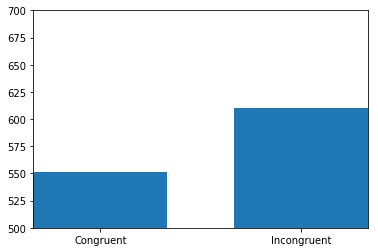

551.6915890183021 610.4051687289088


In [110]:

import sqlite3
import matplotlib.pyplot as pyplot

# Your code here.

### BEGIN SOLUTION

db = sqlite3.connect('stroop_data.db')

cur = db.cursor()
rows = cur.execute("SELECT rt FROM data WHERE congruency = 'I' AND accuracy = 1.0")
rt_i = 0
count_i = 0
for row in rows:
    count_i += 1
    rt_i += row[0]
rt_i /= count_i

cur = db.cursor()
rows = cur.execute("SELECT rt FROM data WHERE congruency = 'C' AND accuracy = 1.0")
rt_c = 0
count_c = 0
for row in rows:
    count_c += 1
    rt_c += row[0]
rt_c /= count_c

yvalues = [rt_c, rt_i]
pyplot.bar([0, 1], yvalues)
pyplot.axis([0,1,500,700])
pyplot.xticks([0.2, 0.8], ["Congruent", "Incongruent"])
pyplot.show()

print(rt_c, rt_i)
### END SOLUTION